## Imports

In [9]:
import json
import os

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2




import matplotlib.pyplot as plt
import numpy


import shelfy.models.similarity

## Levenshtein

In [4]:
import sys
import Levenshtein

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../models/')
import similarity

In [5]:
book_info = {}

book_info['title'] = 'Mining the Social Web'
book_info['authors'] = ['Matthew A. Russell']
book_info['publisher'] = "O'Reilly Media; Second Edition edition (October 20, 2013)"

book_words = shelfy.models.similarity.preprocess_book_info(book_info)
print(book_words)

tokens = ['SECOND', 'EDITION', 'Mining', 'the', 'Social', 'Web', 'Russell', 'Russell', 'O', 'O', "'", "'", 'REILLY', 'REILLY']
tokens = shelfy.models.similarity.preprocess_book_tokens(tokens)

print(tokens)

['mining', 'the', 'social', 'web', 'matthew', 'a', 'russell', 'oreilly', 'media', 'second', 'edition', 'edition', 'october', '20', '2013']
['second', 'edition', 'mining', 'the', 'social', 'web', 'russell', 'russell', 'o', 'o', 'reilly', 'reilly']


distance 5
scale_factor 12.0
distance 6
scale_factor 9.0
distance 4
scale_factor 12.0
distance 5
scale_factor 9.0
distance 7
scale_factor 13.0
distance 6
scale_factor 7.0
distance 7
scale_factor 13.0
distance 6
scale_factor 13.0
distance 5
scale_factor 11.0
distance 0
scale_factor 12.0
distance 6
scale_factor 13.0
distance 6
scale_factor 13.0
distance 6
scale_factor 13.0
distance 6
scale_factor 8.0
distance 6
scale_factor 10.0
distance 5
scale_factor 13.0
distance 6
scale_factor 10.0
distance 6
scale_factor 13.0
distance 7
scale_factor 10.0
distance 6
scale_factor 14.0
distance 7
scale_factor 8.0
distance 7
scale_factor 14.0
distance 7
scale_factor 14.0
distance 5
scale_factor 12.0
distance 6
scale_factor 13.0
distance 0
scale_factor 14.0
distance 0
scale_factor 14.0
distance 7
scale_factor 14.0
distance 7
scale_factor 9.0
distance 7
scale_factor 11.0
distance 0
scale_factor 12.0
distance 6
scale_factor 9.0
distance 5
scale_factor 12.0
distance 6
scale_factor 9.0
distance 6
scale_facto

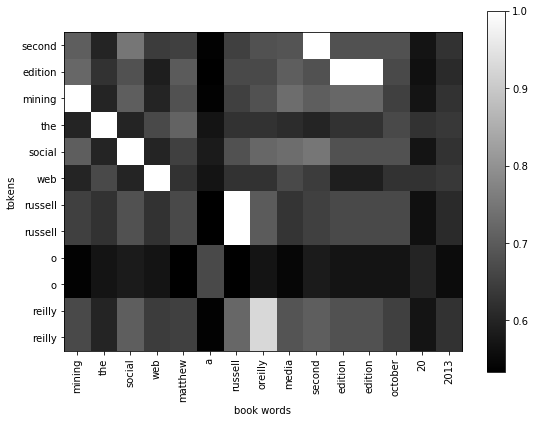

In [8]:
similarities = np.empty((len(tokens), len(book_words)))

fig = plt.figure(figsize = (8,6))

for i, token in enumerate(tokens):
    for j, book_word in enumerate(book_words):
        
        similarities[i,j] = shelfy.models.similarity.single_token_inverse_weighted_levenshtein_tfidf([token], [book_word])
        
        #print(distance/len(token))
        #similarities[j,i] = distance

print(similarities)
        
plt.imshow(similarities, cmap = 'gray')
plt.colorbar()

plt.ylabel('tokens')
plt.xlabel('book words')

plt.yticks([i for i in range(len(tokens))], [token for token in tokens])
plt.xticks([i for i in range(len(book_words))], [word for word in book_words], rotation = 90)

fig.tight_layout()

plt.savefig('token-matching.png', dpi = 300)

plt.show()
        

## Similarity and right/wrong classification

In [17]:
submission_base_directory = shelfy.SHELFY_BASE_PATH + '/static/submissions/'
submissions = [submission for submission in os.listdir(submission_base_directory)]
submission_directories = [submission_base_directory + submission for submission in submissions]


def get_submission_shelf_name(submission_directory):
    with open(submission_directory + '/info.txt', 'r') as file_handle:
        shelf_name = file_handle.readline().split('.')[0]
    return shelf_name

def get_submission_books():
    
        

    
for i in range(len(submissions)):
    directory = submission_directories[i]
    
    book_ids = []
    




['insight_7', 'insight_3', 'home_0', 'insight_2', 'insight_6', 'home_1', 'home_3', 'insight_1', 'insight_5', 'insight_0', 'insight_7', 'insight_4', 'home_5', 'insight_1', 'home_4', 'home_2']
